Slope (m): 171.1733
Intercept (b): 1627.3680
Predicted price for 2500 sq ft: $429560.55


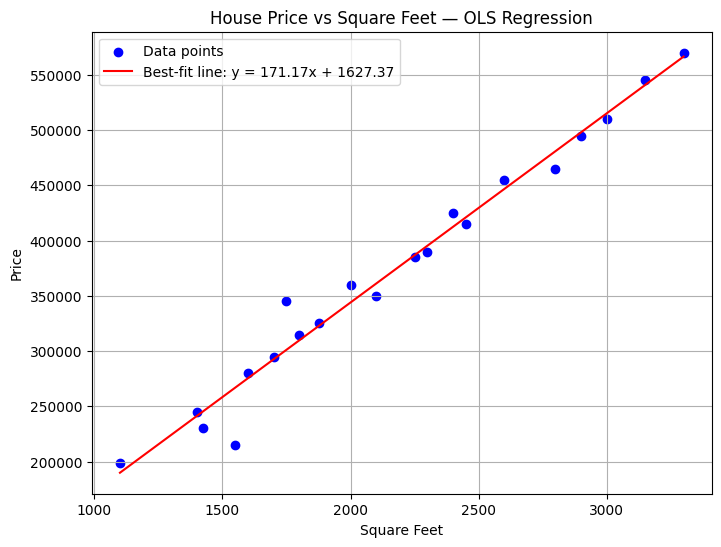

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def load_data(csv_filename):
    X = []
    Y = []
    with open(csv_filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # skip header row
        for row in reader:
            # assume first column = square_feet (float/int), second column = price (float)
            try:
                sqft = float(row[0])
                price = float(row[1])
            except ValueError:
                # skip invalid rows
                continue
            X.append(sqft)
            Y.append(price)
    return np.array(X), np.array(Y)

def fit_ols(X, Y):
    """
    Given numpy arrays X and Y, compute slope m and intercept b
    for the best-fit line Y = m * X + b using ordinary least squares.
    """
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    numerator = np.sum((X - x_mean) * (Y - y_mean))
    denominator = np.sum((X - x_mean)**2)
    m = numerator / denominator
    b = y_mean - m * x_mean
    return m, b

def predict_price(sqft, m, b):
    return m * sqft + b

def plot_regression(X, Y, m, b):
    plt.figure(figsize=(8,6))
    plt.scatter(X, Y, color='blue', label='Data points')
    # line: for plotting, get a range of X values
    x_vals = np.linspace(min(X), max(X), 100)
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='red', label=f'Best-fit line: y = {m:.2f}x + {b:.2f}')
    plt.xlabel('Square Feet')
    plt.ylabel('Price')
    plt.title('House Price vs Square Feet — OLS Regression')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # 1. Load data
    X, Y = load_data('housing_prices - housing_prices.csv')
    if len(X) == 0:
        print("No valid data loaded. Check csv file and format.")
        return

    # 2. Fit OLS
    m, b = fit_ols(X, Y)
    print(f"Slope (m): {m:.4f}")
    print(f"Intercept (b): {b:.4f}")

    # 3. Predict price for 2500 sq ft
    sqft_to_predict = 2500.0
    predicted_price = predict_price(sqft_to_predict, m, b)
    print(f"Predicted price for {sqft_to_predict:.0f} sq ft: ${predicted_price:.2f}")

    # 4. Plot
    plot_regression(X, Y, m, b)
if __name__ == '__main__':
    main()

